# Lab Assignment One: Exploring Table Data

***Azeem Merchant, Prabhat Pal, Pritheesh Panchmahalkar, Sahil Johari***

## 1. Business Understanding

The dataset contains information about the aerial bombing missions from World war II. Each entry in the dataset represents bombing operation largely in terms of date, base of operation, and target. 

According to the data description at [Aerial Bombing Operations in World War II](https://www.kaggle.com/usaf/world-war-ii): _“This dataset consists of digitized paper mission reports from WWII. Each record includes the date, conflict, geographic location, and other data elements to form a live-action sequence of air warfare from 1939 to 1945. The records include U.S. and Royal Air Force data, in addition to some Australian, New Zealand and South African air force missions.”_

As the data is of the entire span of the WWII, we can analyze the bombing patterns over these years. Through visualizing these patterns, we can identify the countries or geographical regions which took the most attacks. Furthermore, it would also highlight the activities of different countries throughout the war. This entire analysis can help historians and scientists to understand the war activities more closely.

If the algorithm works as expected, we can also predict the air warfare which could have happened if the war continued for a couple more years along with the potential target countries.

## 2. Data Understanding

In [306]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")

pd.options.display.max_columns = 50

df = pd.read_csv('Dataset/operations.csv') 

df.head()

,Mission ID,Mission Date,Theater of Operations,Country,Air Force,Unit ID,Aircraft Series,Callsign,Mission Type,Takeoff Base,Takeoff Location,Takeoff Latitude,Takeoff Longitude,Target ID,Target Country,Target City,Target Type,Target Industry,Target Priority,Target Latitude,Target Longitude,Altitude (Hundreds of Feet),Airborne Aircraft,Attacking Aircraft,Bombing Aircraft,Aircraft Returned,Aircraft Failed,Aircraft Damaged,Aircraft Lost,High Explosives,High Explosives Type,High Explosives Weight (Pounds),High Explosives Weight (Tons),Incendiary Devices,Incendiary Devices Type,Incendiary Devices Weight (Pounds),Incendiary Devices Weight (Tons),Fragmentation Devices,Fragmentation Devices Type,Fragmentation Devices Weight (Pounds),Fragmentation Devices Weight (Tons),Total Weight (Pounds),Total Weight (Tons),Time Over Target,Bomb Damage Assessment,Source ID
0,1,8/15/1943,MTO,USA,12 AF,27 FBG/86 FBG,A36,NaN,NaN,PONTE OLIVO AIRFIELD,SICILY,37.131022,14.321464,40675,ITALY,SPADAFORA,NaN,NaN,NaN,38.220000,15.370000,NaN,20.0,NaN,20.0,NaN,NaN,NaN,NaN,40.0,500 LB GP (GP-M43/M64),NaN,10.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.0,NaN,NaN,NaN
1,2,8/15/1943,PTO,USA,5 AF,400 BS,B24,NaN,1,NaN,NaN,NaN,NaN,NaN,NEW GUINEA,KOMIATUM,RIDGE,NaN,1,-7.166667,147.000000,44.0,NaN,6.0,NaN,NaN,NaN,NaN,NaN,40.0,1000 LB GP (GP-M44/M65),NaN,20.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20.0,NaN,NaN,9366.0
2,3,8/15/1943,MTO,USA,12 AF,27 FBG/86 FBG,A36,NaN,NaN,PONTE OLIVO AIRFIELD,SICILY,37.131022,14.321464,9630,ITALY,COSENZA,NaN,NaN,NaN,39.270000,16.250000,NaN,18.0,NaN,36.0,NaN,NaN,NaN,NaN,36.0,500 LB GP (GP-M43/M64),NaN,9.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.0,NaN,NaN,NaN
3,4,8/15/1943,MTO,USA,12 AF,27 FBG/86 FBG,A36,NaN,NaN,PONTE OLIVO AIRFIELD,SICILY,37.131022,14.321464,16140,ITALY,GIOJA TAURO,NaN,NaN,NaN,38.430000,15.900000,NaN,15.0,NaN,15.0,NaN,1.0,NaN,NaN,30.0,500 LB GP (GP-M43/M64),NaN,7.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.5,NaN,NaN,NaN
4,5,8/15/1943,PTO,USA,5 AF,321 BS,B24,NaN,1,NaN,NaN,NaN,NaN,NaN,SUMATRA,KILA,VILLAGE,NaN,1,-1.116667,103.883333,60.0,NaN,6.0,NaN,NaN,NaN,NaN,NaN,16.0,1000 LB GP (GP-M44/M65),NaN,8.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.0,NaN,NaN,22585.0


We begin by loading the dataset from the Comma-separated values (.csv) file and use Pandas to create a data frame for it.

In [259]:
df.shape

(178281, 46)

Our dataset consists of 178281 rows and 46 columns.

In [260]:
df.describe()

,Mission ID,Takeoff Longitude,Target Latitude,Target Longitude,Altitude (Hundreds of Feet),Airborne Aircraft,Attacking Aircraft,Bombing Aircraft,Aircraft Returned,Aircraft Failed,Aircraft Damaged,Aircraft Lost,High Explosives,High Explosives Weight (Tons),Incendiary Devices,Incendiary Devices Weight (Pounds),Incendiary Devices Weight (Tons),Fragmentation Devices,Fragmentation Devices Weight (Pounds),Fragmentation Devices Weight (Tons),Total Weight (Pounds),Total Weight (Tons),Source ID
count,178281.000000,2980.000000,169565.000000,169543.000000,120826.000000,82242.000000,125108.000000,81612.000000,133.000000,247.000000,38.000000,158.000000,34737.000000,146201.000000,3283.000000,356.000000,25732.000000,5768.000000,194.000000,16902.000000,2.119000e+03,166508.000000,174236.000000
mean,89414.547041,220.618627,38.067793,43.340213,139.026812,12.329771,10.218899,12.347486,2.157895,4.275304,2.052632,2.279253,33.331215,23.911995,132.001965,19962.732022,21.527213,102.684560,2065.630928,12.017136,1.237718e+04,25.760326,152670.902322
std,51649.744549,454.046956,18.711405,59.681160,186.818278,12.514833,11.246399,12.573549,1.369816,5.924758,1.675699,6.414377,105.356530,90.092020,498.596761,45331.714255,66.692639,158.941650,2424.138566,27.221410,2.064155e+05,90.643876,105544.795936
min,1.000000,-177.328611,-37.416667,-179.451285,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,1.000000
25%,44571.000000,14.400000,26.250000,7.620000,70.000000,2.000000,2.000000,2.000000,1.000000,1.000000,1.000000,1.000000,8.000000,2.000000,7.000000,218.750000,1.000000,10.000000,598.400000,1.000000,2.100000e+03,2.000000,53476.500000
50%,89540.000000,29.851389,47.500000,11.330000,122.000000,11.000000,7.000000,11.000000,2.000000,2.000000,1.500000,1.000000,16.000000,9.000000,14.000000,2640.000000,6.000000,38.461538,1500.000000,3.000000,5.200000e+03,9.290000,167604.500000
75%,134171.000000,96.133222,50.930000,97.400000,223.000000,17.000000,12.000000,18.000000,3.000000,4.000000,2.750000,2.000000,36.000000,30.000000,32.000000,12500.000000,18.000000,133.333333,2400.000000,12.000000,1.080000e+04,31.000000,211284.250000
max,178742.000000,1355.000000,1108.000000,1000.650000,40000.000000,332.000000,332.000000,332.000000,7.000000,48.000000,9.000000,80.000000,10000.000000,20000.000000,4875.000000,420000.000000,999.000000,3000.000000,20640.000000,900.000000,9.500000e+06,20000.000000,699625.000000


According to the data frame information, there are null values in our dataset, which the dataset shows as a lot of ‘NaN’ values. We can impute it using mean, median, or mode based on the nature of the features.

In [261]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178281 entries, 0 to 178280
Data columns (total 46 columns):
Mission ID                               178281 non-null int64
Mission Date                             178281 non-null object
Theater of Operations                    175123 non-null object
Country                                  126494 non-null object
Air Force                                126444 non-null object
Unit ID                                  50913 non-null object
Aircraft Series                          178165 non-null object
Callsign                                 21 non-null object
Mission Type                             47186 non-null object
Takeoff Base                             3383 non-null object
Takeoff Location                         3338 non-null object
Takeoff Latitude                         2981 non-null object
Takeoff Longitude                        2980 non-null float64
Target ID                                127406 non-null object
Target 

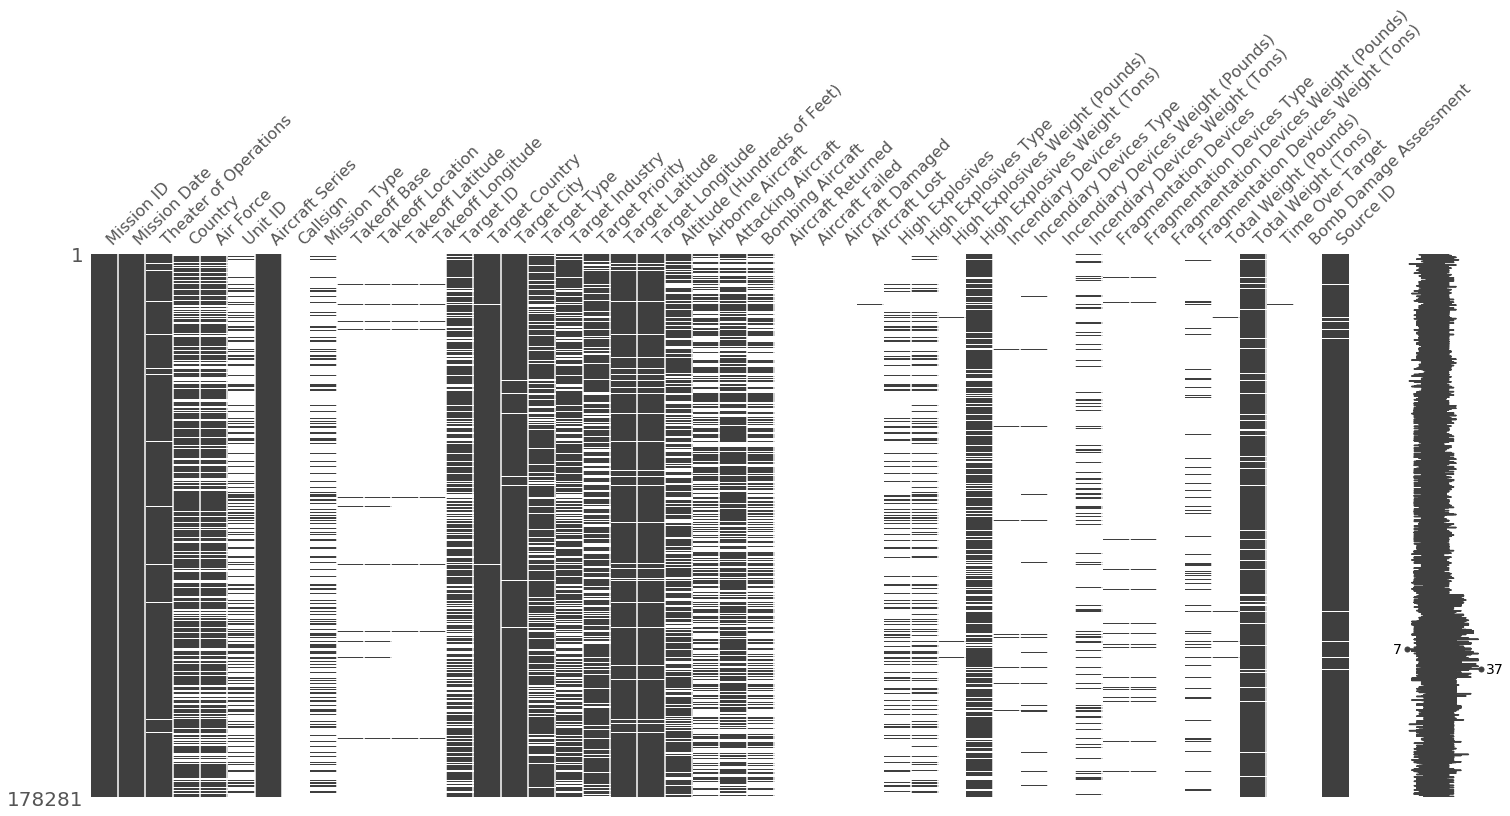

In [262]:
import missingno as mn
mn.matrix(df)

We find the missing values with the help of matrix visualization. As we can see, the white portion represents missing numbers which needs to be cleaned up. To do so, we identify the columns with most missing values and delete them. For this, we have set a threshold value of 60%.

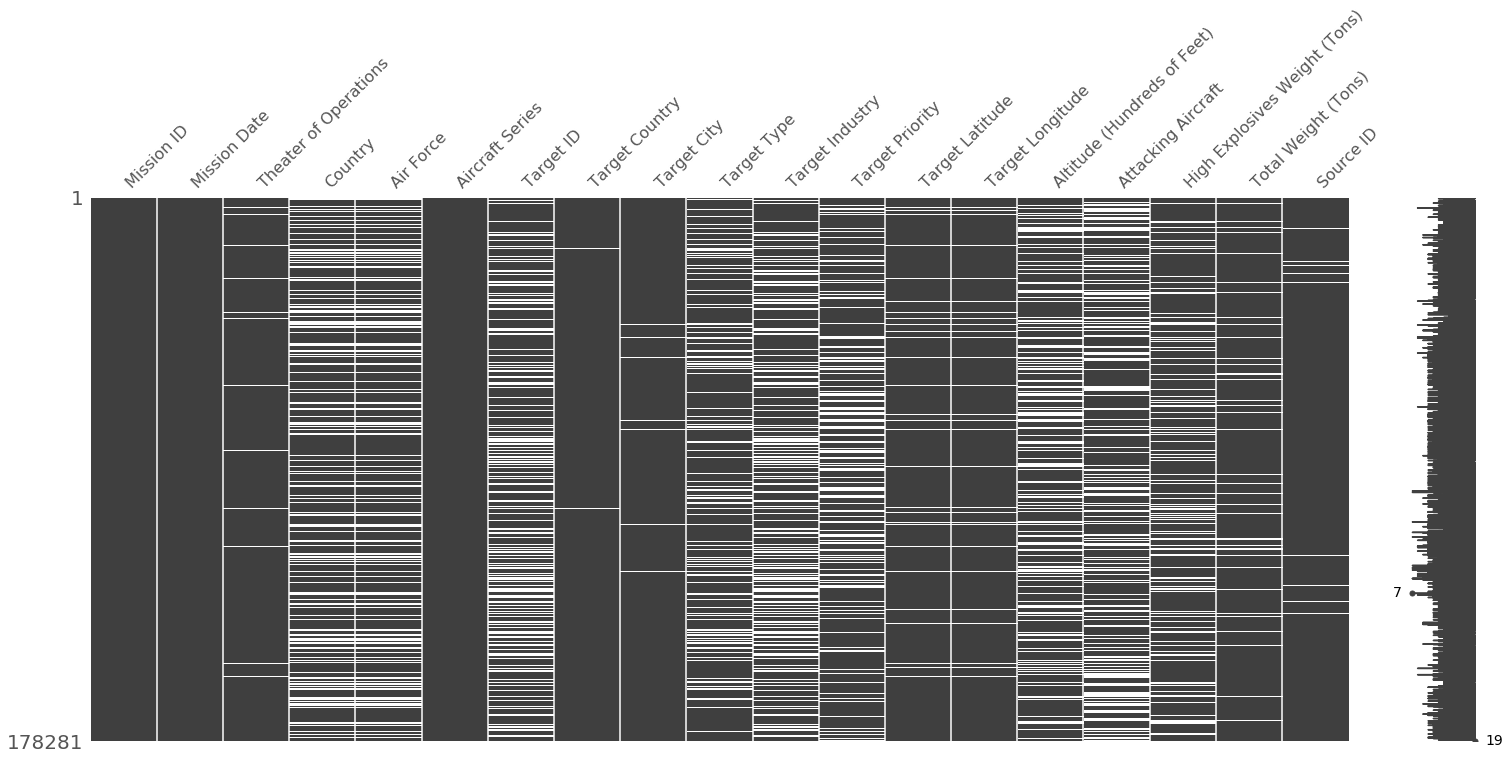

In [307]:
frac = len(df) * 0.6
df.dropna(thresh=frac, axis=1, inplace=True)
mn.matrix(df)

In [264]:
df.shape

(178281, 19)

After the clean-up, the data appears much better and a lot of gaps have been eliminated from it. Removing the missing value columns has lead to a drop in the number of columns from 46 to 19.

In [265]:
df.describe()

,Mission ID,Target Latitude,Target Longitude,Altitude (Hundreds of Feet),Attacking Aircraft,High Explosives Weight (Tons),Total Weight (Tons),Source ID
count,178281.000000,169565.000000,169543.000000,120826.000000,125108.000000,146201.000000,166508.000000,174236.000000
mean,89414.547041,38.067793,43.340213,139.026812,10.218899,23.911995,25.760326,152670.902322
std,51649.744549,18.711405,59.681160,186.818278,11.246399,90.092020,90.643876,105544.795936
min,1.000000,-37.416667,-179.451285,0.000000,0.000000,0.000000,0.000000,1.000000
25%,44571.000000,26.250000,7.620000,70.000000,2.000000,2.000000,2.000000,53476.500000
50%,89540.000000,47.500000,11.330000,122.000000,7.000000,9.000000,9.290000,167604.500000
75%,134171.000000,50.930000,97.400000,223.000000,12.000000,30.000000,31.000000,211284.250000
max,178742.000000,1108.000000,1000.650000,40000.000000,332.000000,20000.000000,20000.000000,699625.000000


In [308]:
df = df.rename(columns = {
                            'Mission ID': 'Mission_ID', 
                            'Mission Date': 'Mission_Date',
                            'Theater of Operations': 'Theater_of_Operations',
                            'Country': 'Country',
                            'Air Force': 'Air_Force',
                            'Aircraft Series': 'Aircraft_Series',
                            'Target ID': 'Target_ID',
                            'Target Country': 'Target_Country',
                            'Target City': 'Target_City',
                            'Target Type': 'Target_Type',
                            'Target Industry': 'Target_Industry',
                            'Target Priority': 'Target_Priority',
                            'Target Latitude': 'Target_Latitude',
                            'Target Longitude': 'Target_Longitude',
                            'Altitude (Hundreds of Feet)': 'Altitude',
                            'Attacking Aircraft': 'Attacking_Aircraft',
                            'High Explosives Weight (Tons)': 'High_Explosives_Weight',
                            'Total Weight (Tons)': 'Total_Weight',
                            'Source ID': 'Source_ID'})

df.head()

,Mission_ID,Mission_Date,Theater_of_Operations,Country,Air_Force,Aircraft_Series,Target_ID,Target_Country,Target_City,Target_Type,Target_Industry,Target_Priority,Target_Latitude,Target_Longitude,Altitude,Attacking_Aircraft,High_Explosives_Weight,Total_Weight,Source_ID
0,1,8/15/1943,MTO,USA,12 AF,A36,40675,ITALY,SPADAFORA,NaN,NaN,NaN,38.220000,15.370000,NaN,NaN,10.0,10.0,NaN
1,2,8/15/1943,PTO,USA,5 AF,B24,NaN,NEW GUINEA,KOMIATUM,RIDGE,NaN,1,-7.166667,147.000000,44.0,6.0,20.0,20.0,9366.0
2,3,8/15/1943,MTO,USA,12 AF,A36,9630,ITALY,COSENZA,NaN,NaN,NaN,39.270000,16.250000,NaN,NaN,9.0,9.0,NaN
3,4,8/15/1943,MTO,USA,12 AF,A36,16140,ITALY,GIOJA TAURO,NaN,NaN,NaN,38.430000,15.900000,NaN,NaN,7.5,7.5,NaN
4,5,8/15/1943,PTO,USA,5 AF,B24,NaN,SUMATRA,KILA,VILLAGE,NaN,1,-1.116667,103.883333,60.0,6.0,8.0,8.0,22585.0


Below is a table showing the description of features in terms of scales and categorizing the values into Discrete and Continuous.

In [309]:
df_desc = pd.DataFrame()
df_desc['Attributes'] = df.columns
df_desc['Description'] = [ 'Mission ID', 'Mission date', 'Base of operations',
                            'Country that carried out the operation', 'Name of Air Force units', 
                            'Series of Aircraft used', 'Target ID', 'Target Country', 'Target City', 'Target Type',
                            'Target Industry', 'Target Priority', 'Target Latitude', 'Target Longitude', 
                            'Altitude(Feet in hundreds)', 'Number of aircrafts used', 'High Explosives weight used',
                            'Total weight', 'Source ID' ]
df_desc['Scales'] = ['Nominal'] + ['Interval'] + ['Nominal'] * 9 + ['Ordinal'] + ['Ratio'] * 6 + ['Nominal']
df_desc['Discrete/Continuous'] = ['Discrete'] + ['Continuous'] + ['Discrete'] * 10 + ['Continuous'] * 6 + ['Discrete']
df_desc

,Attributes,Description,Scales,Discrete/Continuous
0,Mission_ID,Mission ID,Nominal,Discrete
1,Mission_Date,Mission date,Interval,Continuous
2,Theater_of_Operations,Base of operations,Nominal,Discrete
3,Country,Country that carried out the operation,Nominal,Discrete
4,Air_Force,Name of Air Force units,Nominal,Discrete
5,Aircraft_Series,Series of Aircraft used,Nominal,Discrete
6,Target_ID,Target ID,Nominal,Discrete
7,Target_Country,Target Country,Nominal,Discrete
8,Target_City,Target City,Nominal,Discrete
9,Target_Type,Target Type,Nominal,Discrete


In [268]:
idx = df.duplicated()

len(df[idx])

0

It seems that after the clean-up, we eliminated the duplicate values. As per our discussion on understanding the cause behind such an output, we reached on a conclusion that the dataset has mission records on aerial bombing and it is apparent that no two missions would have the same column values, or it would have been quite a predictable war!

## 3. Data Visualization

### 3.1. Data Exploration

In [269]:
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter('ignore', DeprecationWarning)
%matplotlib inline 

#### 3.1.1. Number of attacks on countries

In [270]:
df_grouped = df.groupby('Target_Country').filter(lambda group: len(group['Target_Country']) > 150)

df_grouped_target_country = df_grouped.groupby('Target_Country')

for val,grp in df_grouped_target_country:
    print(val, 'was attacked ',len(grp),' times.')

# print( df_grouped_target_country.Target_Country.count)


ALEUTIAN ISLANDS was attacked  239  times.
AUSTRIA was attacked  4380  times.
BELGIUM was attacked  2149  times.
BISMARK ARCHIPELAGO was attacked  3484  times.
BORNEO was attacked  1399  times.
BURMA was attacked  8259  times.
CAROLINE ISLANDS was attacked  1032  times.
CELEBES ISLANDS was attacked  3094  times.
CHINA was attacked  4060  times.
CZECHOSLOVAKIA was attacked  995  times.
FORMOSA AND RYUKYU ISLANDS was attacked  1803  times.
FRANCE was attacked  22226  times.
FRENCH INDO CHINA was attacked  642  times.
GERMANY was attacked  61744  times.
GREECE was attacked  748  times.
HOLLAND OR NETHERLANDS was attacked  3560  times.
HUNGARY was attacked  874  times.
ITALY was attacked  23689  times.
JAPAN was attacked  2748  times.
JAVA was attacked  346  times.
KURILE ISLANDS was attacked  176  times.
LIBYA was attacked  491  times.
MARIANAS ISLANDS was attacked  358  times.
MARSHALL ISLANDS was attacked  715  times.
NEW GUINEA was attacked  7213  times.
NEW IRELAND was attacked  260  

Text(0.5,1,'Number of attacks on countries')

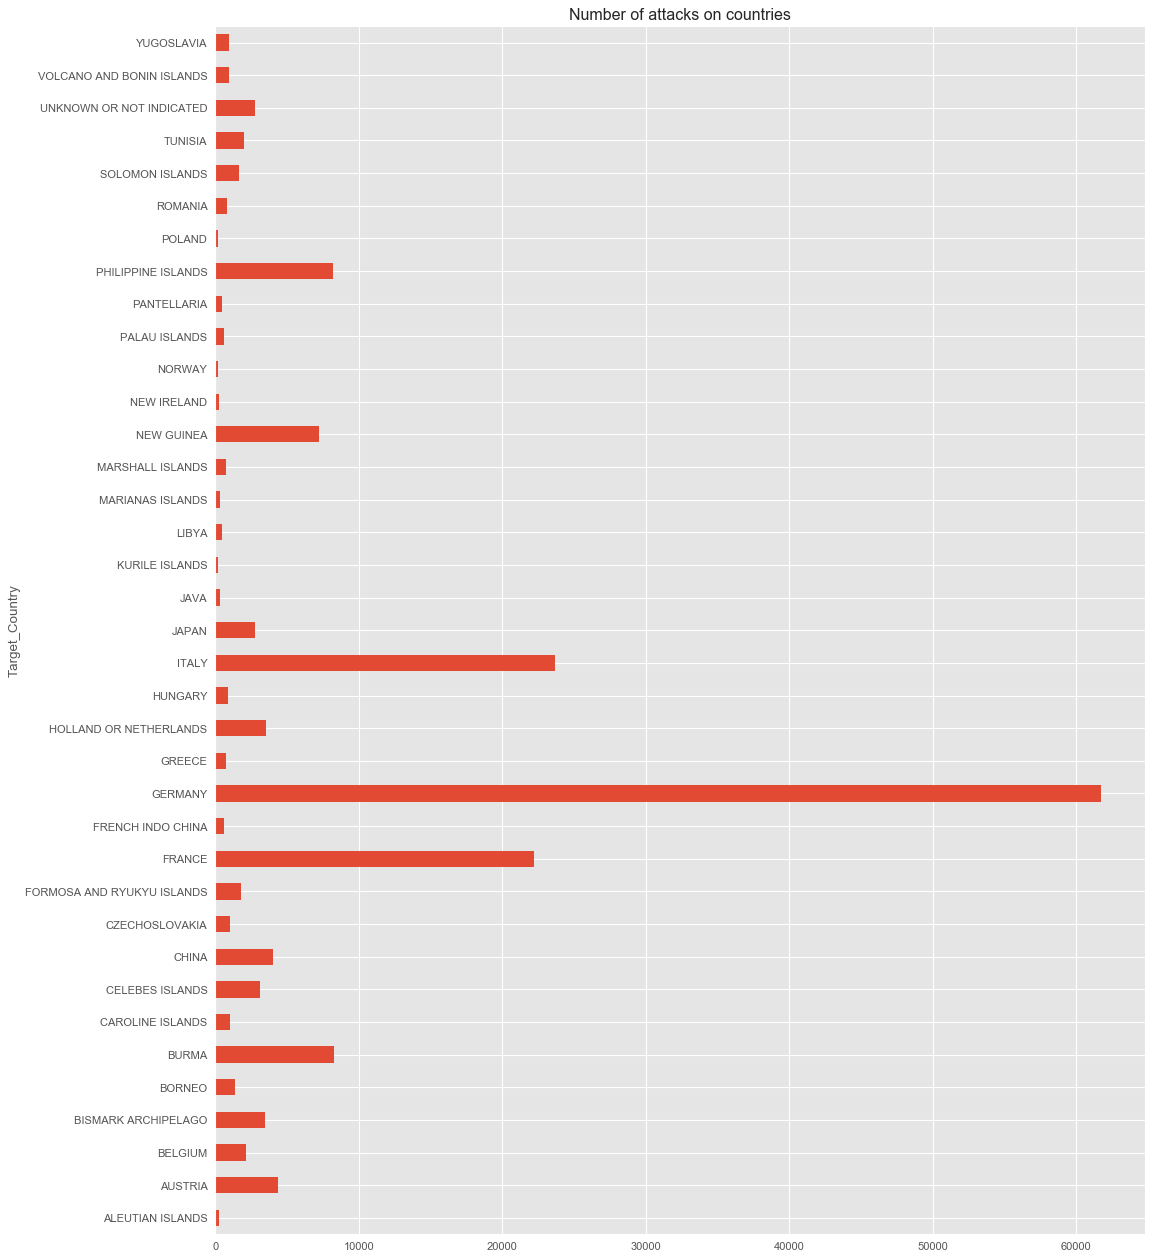

In [416]:
plt.style.use('ggplot')

plt.figure(num=None, figsize=(15,20), dpi=80, facecolor='w', edgecolor='k')

attack_frequency = df_grouped_target_country.Target_Country.count()
ax = attack_frequency.plot(kind='barh')
plt.title('Number of attacks on countries')

We visualized the number of aerial attacks taken by countries during the war. It can be observed that Germany took the most damage and was attacked 61744 times. Italy was the second highest among the attacked countries with 23689 attacks, nearly 3 times lesser than Germany. France was third in the attack line. Overall, it can be concluded that European countries were major targets and took the most aerial damage throughout the war.

#### 3.1.2. Number of attacks carried out by countries

In [272]:
df_grouped_attacking_country = df.groupby('Country')
print(df_grouped_attacking_country.Country.count())

Country
AUSTRALIA          316
GREAT BRITAIN    31361
NEW ZEALAND        633
SOUTH AFRICA        19
USA              94165
Name: Country, dtype: int64


Text(0.5,1,'Number of attacks carried out by countries')

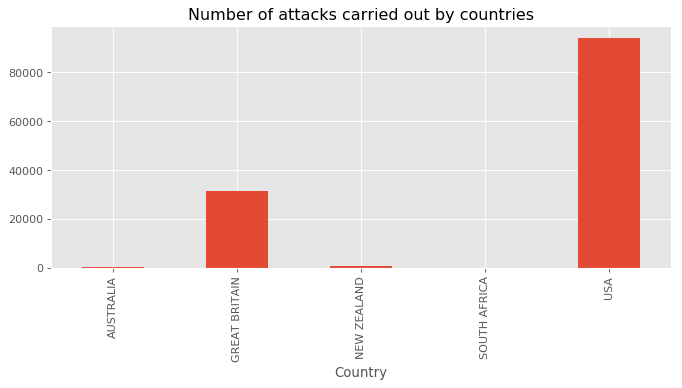

In [293]:
attack_frequency = df_grouped_attacking_country.Country.count()

plt.figure(num=None, figsize=(10,4), dpi=80, facecolor='w', edgecolor='k')

ax = attack_frequency.plot(kind='bar')
plt.title('Number of attacks carried out by countries')

Contrary to the previous analysis, we also found the countries which carried out the most and the least number of bombing missions. From the visualization, USA appears to be the highest attacking country with 94165 attacks, followed by Great Britain. South Africa was the least attacking nation. There are no Asian countries that we found in this category from our dataset.

#### 3.1.3. Number of attacks per year

In [274]:
df['Mission_Year'] = pd.to_datetime(df['Mission_Date']).dt.year
df_grouped_mission_year = df.groupby('Mission_Year')

print(df_grouped_mission_year.Mission_Year.count())


Mission_Year
1939       41
1940     6742
1941    10275
1942     6051
1943    23214
1944    80550
1945    51408
Name: Mission_Year, dtype: int64


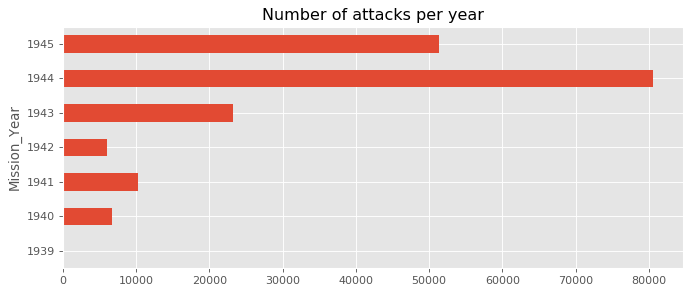

In [275]:
attack_frequency = df_grouped_mission_year.Mission_Year.count()

plt.figure(num=None, figsize=(10,4), dpi=80, facecolor='w', edgecolor='k')
plt.title('Number of attacks per year')

ax = attack_frequency.plot(kind='barh')

It is interesting to see the trend in attacks through the war years. The “Number of attacks per year” shows the number of bombing attacks carried out in each year of the war. The data is collective and is not categorized by countries. As we can see, the year 1944 saw most destruction and shows that the countries were most active during that year. On the contrary, the initial years did not see much attacks. 

#### 3.1.4. Number of attacks by different Air forces

In [276]:
df_grouped_air_force = df.groupby(['Air_Force'])

print(df_grouped_air_force.Air_Force.count())

Air_Force
1 TAC         553
10 AF        6922
11 AF         414
12 AF       18748
13 AF        6657
14 AF        4593
15 AF        8700
20 AF        2518
5 AF        19027
7 AF         6564
8 AF        10385
9 AF         9034
RAAF          315
RAAF/NEI        1
RAF         31361
RNZAF         633
SAAF           19
Name: Air_Force, dtype: int64


Text(0.5,1,'Number of attacks by different Air forces')

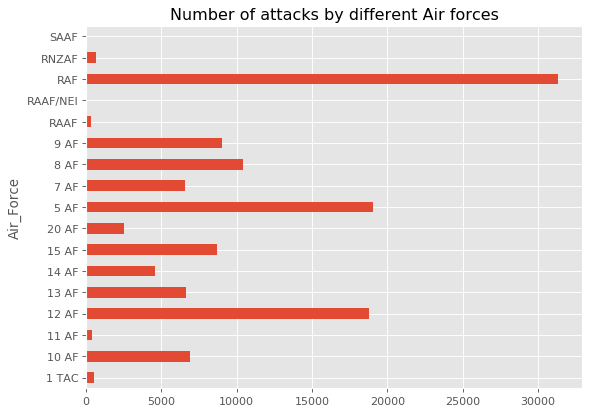

In [277]:
plt.figure(num=None, figsize=(8,6), dpi=80, facecolor='w', edgecolor='k')

attack_frequency = df_grouped_air_force.Air_Force.count()
ax = attack_frequency.plot(kind='barh')
plt.title('Number of attacks by different Air forces')


From the above bar chart, we can see that the largest number of attacks were carried out by UK's RAF (Royal Air Force). This could be an indication that RAF was the largest airforce by number of aircrafts at the time.

### 3.2. Data Relationship Exploration

#### 3.2.1. Total weight of explosives used on each country

In [397]:
df_grouped_explosive = df.groupby(['Target_Country'])

print(df_grouped_explosive.High_Explosives_Weight.sum().dropna())

Target_Country
"PAPUA NEW GUINEA, MANUS ISLAND"         12.000
ALBANIA                                1056.000
ALEUTIAN ISLANDS                       1027.000
ALGERIA                                  18.000
ANDAMAN ISLANDS                          32.000
AUSTRALIA                                 0.850
AUSTRIA                              134354.000
BALI                                     34.950
BELGIUM                               49920.000
BISMARK ARCHIPELAGO                   28078.600
BORNEO                                11379.000
BOUGAINVILLE                            292.600
BULGARIA                               5497.000
BURMA                                 28544.865
CAROLINE ISLANDS                       8979.000
CELEBES ISLANDS                       16533.000
CHINA                                  8882.310
CHINA MINING                            128.000
CORAL SEA AREA                          283.000
CORSICA                                  34.000
CRETE                    

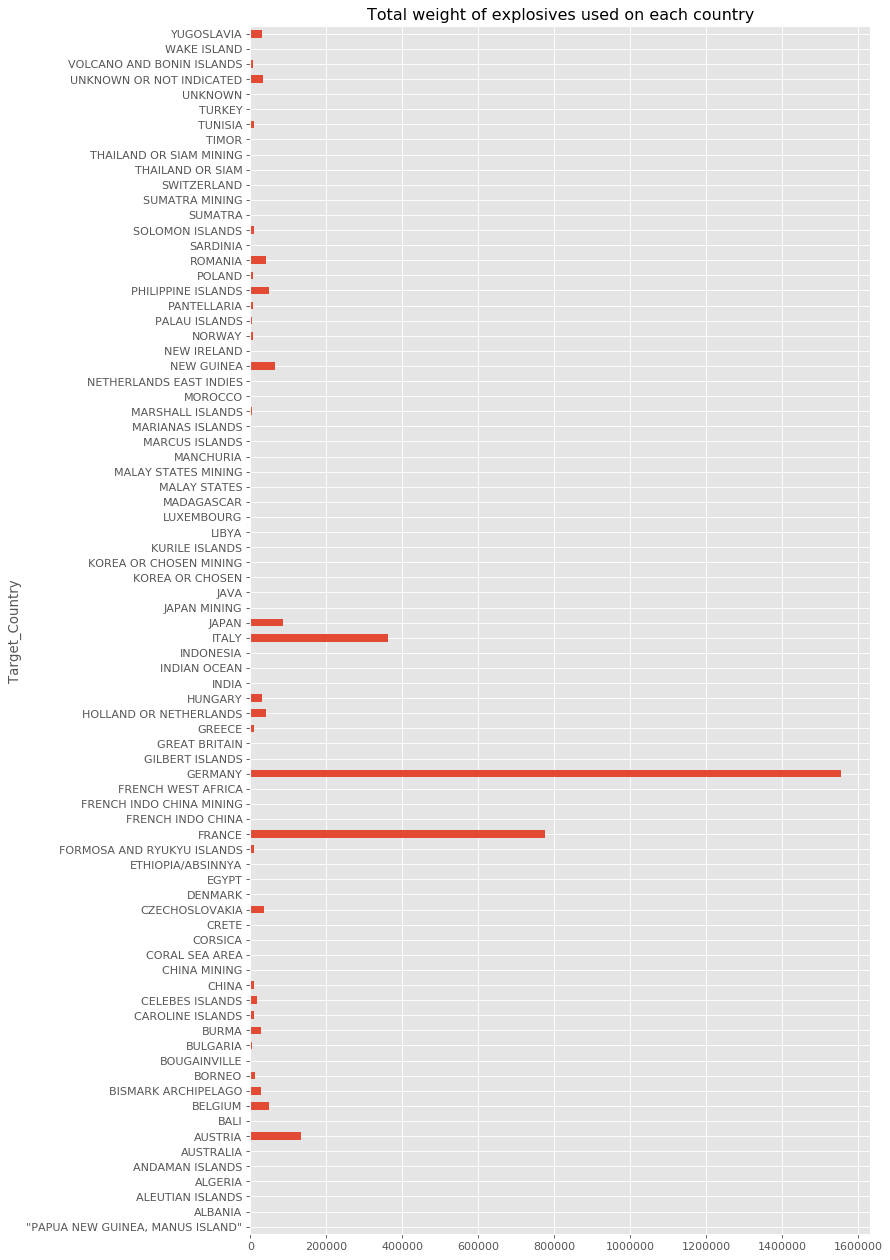

In [399]:
attack_frequency = df_grouped_explosive.High_Explosives_Weight.sum().dropna()

plt.figure(num=None, figsize=(10,20), dpi=80, facecolor='w', edgecolor='k')
plt.title('Total weight of explosives used on each country')

ax = attack_frequency.plot(kind='barh')

It is observed from the above graph that the maximum weight of explosives were used to attack Germany (1553716 tons), followed by France (776616 tons) and Italy (361485 tons). From this we can correlate that the number of attacks and the weight of explosives used were directly proprtional.

#### 3.2.2. Number of attacks per year

In [428]:
df_grouped_country_air = df.groupby(['Country','Air_Force'])
print(df_grouped_country_air.Air_Force.count())

Country        Air_Force
AUSTRALIA      RAAF           315
               RAAF/NEI         1
GREAT BRITAIN  RAF          31361
NEW ZEALAND    RNZAF          633
SOUTH AFRICA   SAAF            19
USA            1 TAC          553
               10 AF         6922
               11 AF          414
               12 AF        18748
               13 AF         6657
               14 AF         4593
               15 AF         8700
               20 AF         2518
               5 AF         19027
               7 AF          6564
               8 AF         10385
               9 AF          9034
Name: Air_Force, dtype: int64


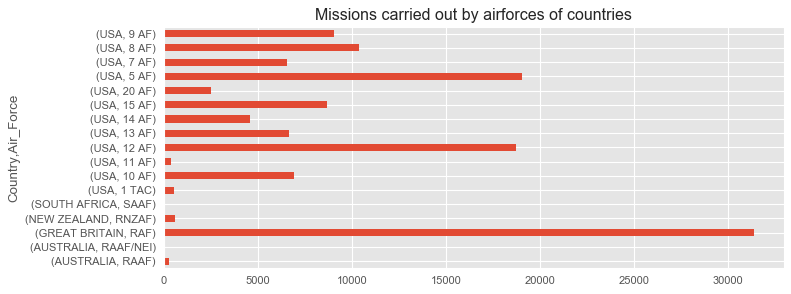

In [431]:
attack_frequency = df_grouped_country_air.Air_Force.count()

plt.figure(num=None, figsize=(10,4), dpi=80, facecolor='w', edgecolor='k')
plt.title('Missions carried out by airforces of countries')

ax = attack_frequency.plot(kind='barh')

Different countries used their air force series to perform the aerial bombing missions, as shown above. The most active of them was Great Britain's RAF. It is evident that though USA carried out most of the attacks during the war, Great Britain used single force throughout. Also, USA's 5 AF has the second highest missions among all the attacking air forces.

#### 3.2.3. Correlation Matrix Graph

Text(0.5,1,'Correlation Matrix Graph')

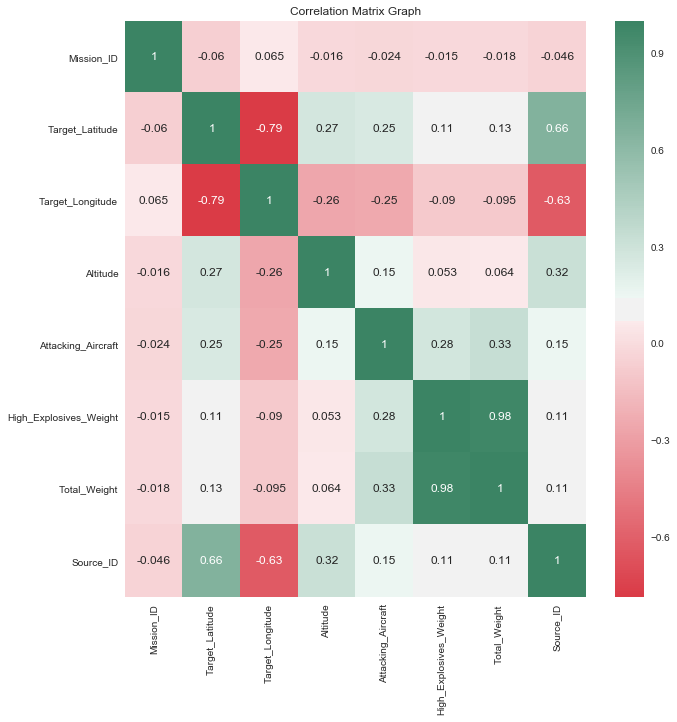

In [439]:
import seaborn as sns
cmap = sns.diverging_palette(10, 150, as_cmap=True)

sns.set(style="darkgrid") # one of the many styles to plot using

f, ax = plt.subplots(figsize=(10, 10))

sns.heatmap(df.corr(), cmap=cmap, annot=True)

f.tight_layout()
plt.title('Correlation Matrix Graph')

As per the correlation table, the "Attacking aircraft" has positive correlations with "High_Explosive_Weight" and "Total_Weight". From this, we can imply that the attacking aircrafts were largely loaded with explosives. Furthermore, the attacking aircrafts have a negative correlation with "Target_Longitudes". It can be inferred that most of the attack targets were not mapped longitudinally, but latitudinally.

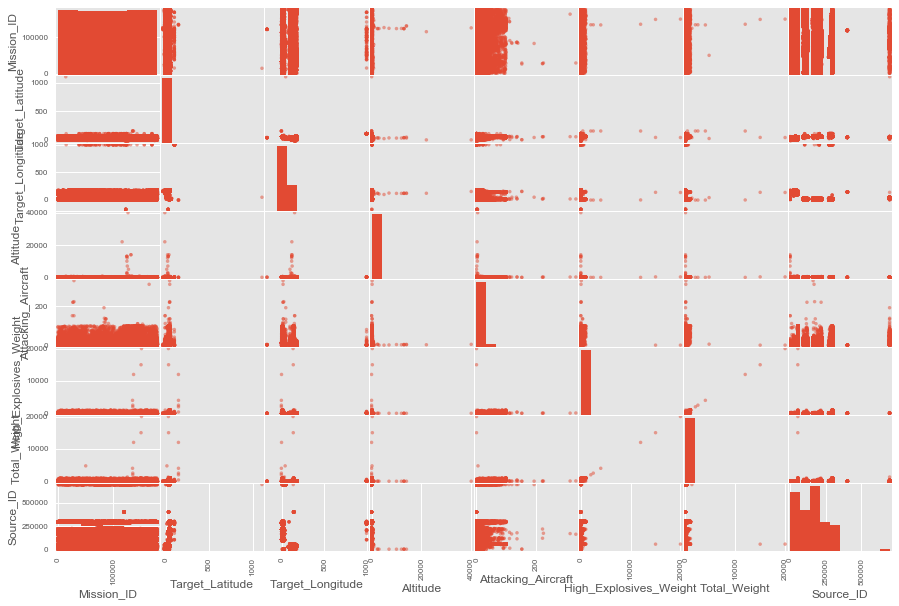

In [418]:
from sklearn import preprocessing
from pandas.plotting import scatter_matrix

ax = scatter_matrix(df, figsize = (15, 10))

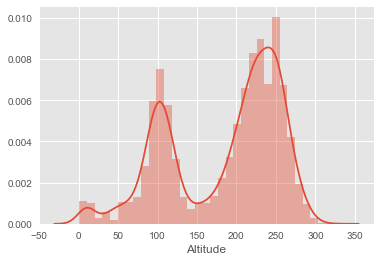

In [437]:
sns.distplot(df.dropna().Altitude)

The above distribution plot shows that the most common altitudes for releasing the bombs were 10000ft and 25000ft above sea level. This could mean that the most common aircrafts utilized in World War II were ones that could bomb from that altitude range.  

In [441]:
from sklearn.decomposition.pca import PCA
from sklearn import preprocessing
df_scaled = df.dropna().copy()
my_list = ['Mission_Date','Theater_of_Operations','Country','Air_Force','Aircraft_Series','Target_Country',
            'Target_City', 'Target_Industry', 'Attacking_Aircraft', 'Mission_Year', 'Target_Type']

for col in my_list:
    if col in df_scaled:
        del df_scaled[col]
        
df_scaled = preprocessing.scale(df_scaled)
df_scaled=pd.DataFrame(df_scaled)
df_scaled.head()

,0,1,2,3,4,5,6,7,8
0,-1.635919,-0.338734,1.025865,1.305519,-0.114412,1.130880,0.048810,-0.016020,0.049390
1,-1.635900,-0.338734,1.025865,1.305519,-0.114412,0.961846,-0.345659,-0.359183,0.049412
2,-1.635289,-0.400220,1.025865,-0.043978,-0.049980,0.919587,0.084670,0.015177,0.398859
3,-1.635270,-0.283834,2.474878,-0.046749,-0.055033,0.919587,-0.668406,-0.639953,0.398925
4,-1.635251,-0.283834,2.474878,-0.046749,-0.055033,0.891415,-0.489102,-0.483970,0.398903


In [442]:
from sklearn.decomposition import PCA

X = df_scaled
y = df.Altitude
target_names='Altitude'

pca = PCA(n_components=2)
X_pca = pca.fit(X).transform(X) # fit data and then transform it

print ('pca:', pca.components_)

pca: [[ 0.03038086 -0.31035532  0.29214676  0.39467351  0.11713812  0.39099002
   0.47796783  0.48906137  0.16556225]
 [ 0.00642713 -0.25161557  0.07177664  0.44555457  0.19688048  0.46106998
  -0.4407141  -0.44776374 -0.294803  ]]


## Reference

Kaggle: Aerial Bombing Operations in World War II. https://www.kaggle.com/usaf/world-war-ii